In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:

df1=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

# Assessing 

In [4]:
df1

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
df1.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# NO null-values 

In [8]:
df1.PatientId.duplicated().value_counts()

False    62299
True     48228
Name: PatientId, dtype: int64

In [9]:
df1.duplicated().value_counts()

False    110527
dtype: int64

In [10]:
df1.AppointmentID.duplicated().value_counts()

False    110527
Name: AppointmentID, dtype: int64

same patient may have many appointments with different appointment id so there's no duplication to remove 

In [11]:
df1['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [12]:
df1['Gender'].value_counts()


F    71840
M    38687
Name: Gender, dtype: int64

In [13]:
df1['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [14]:
df1['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [15]:
df1['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [16]:
df1.groupby(['No-show']).agg({'Neighbourhood':['value_counts']})

Neighbourhood
                                     value_counts
No-show Neighbourhood                            
No      JARDIM CAMBURI                       6252
        MARIA ORTIZ                          4586
        RESISTÊNCIA                          3525
        JARDIM DA PENHA                      3246
        SANTA MARTHA                         2635
...                                           ...
Yes     PONTAL DE CAMBURI                      12
        ILHA DO BOI                             3
        ILHA DO FRADE                           2
        ILHAS OCEÂNICAS DE TRINDADE             2
        AEROPORTO                               1

[160 rows x 1 columns]

cleaning 
patientId to int
ScheduledDay ,AppointmentDay to datetime
age have outliers 

Attending (no show) depends on gender, age (category),sms received ,neighbourhood ,ScheduledDay ==AppointmentDay, scholarship ,type of desiese 

# Cleaning

In [17]:
#copying all data into new dataframe
df_clean=df1.copy()


In [18]:
#patientId to int
df_clean['PatientId']=df_clean['PatientId'].astype(int)

In [19]:
#ScheduledDay ,AppointmentDay to datetime
df_clean['ScheduledDay']=pd.to_datetime(df_clean['ScheduledDay'])
df_clean['AppointmentDay']=pd.to_datetime(df_clean['AppointmentDay'])

In [20]:
#Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64


Text(0.5, 1.0, 'age distribution')

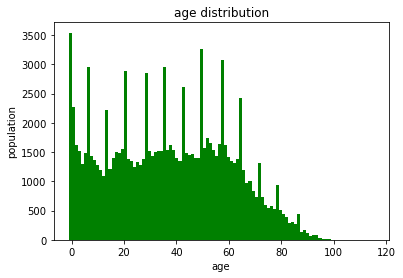

In [21]:
#ploting age
print(df_clean['Age'].value_counts())
x=df_clean['Age']
num_bins=100
n, bins, patches = plt.hist(x, num_bins,color ='green')
plt.xlabel('age')
plt.ylabel('population')
plt.title('age distribution')

In [22]:
#cleaning outliers from age using avg value to replace outliers as -1 and above 90
df_clean.Age[df_clean['Age']==-1]=37
df_clean.Age[df_clean['Age']>90]=37

<ipython-input-22-8422f6d84034>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.Age[df_clean['Age']==-1]=37
<ipython-input-22-8422f6d84034>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.Age[df_clean['Age']>90]=37


In [23]:
#Test
df_clean.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,36.931809,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,22.916078,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,90.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Analysis and visualization

# Question 1


what's the percentage of people who attend/missed thier apointments ?

In [24]:
#changing gender and no-show from catgorical data to numerical for easier investigation 
df_clean['Gender']=pd.get_dummies(df_clean['Gender'])
df_clean['No-show']=pd.get_dummies(df_clean['No-show'])

In [25]:

x=((df_clean['No-show'][df_clean['No-show']==1].sum())/df_clean['No-show'].count())*100
y=100-x
print('percentage of people who attend thier apointments {} %'.format(x.round()))
print('percentage of people who miss thier apointments {} %'.format(y.round()))



percentage of people who attend thier apointments 80.0 %
percentage of people who miss thier apointments 20.0 %


finding reason for the 20% not showing 

# Question 2

What reasons behind the missed appointments ?

# assumptions

assumption 1

Assuming the difference between appointmentday and scheduledday getting longer 'll increase the chance of missing the apointment

In [26]:
# getting the difference between appointmentday and scheduledday to check for correllation with no-show 
# assuming bigger the gap people don't attend 
df_clean['diff_day']=(df_clean['AppointmentDay']-df_clean['ScheduledDay']).dt.days

In [27]:
#cleaning -ve values of diff_days 
df_clean.diff_day[df_clean.diff_day<0]=0
df_clean['diff_day']

<ipython-input-27-61da7d7b1854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.diff_day[df_clean.diff_day<0]=0


0          0
1          0
2          0
3          0
4          0
          ..
110522    34
110523    34
110524    40
110525    40
110526    40
Name: diff_day, Length: 110527, dtype: int64

In [28]:
df_clean.diff_day.corr(df_clean['No-show'])

-0.180074027220243

Conclusion no correlation between the difference between appointmentday and scheduledday and missing apointments

In [29]:
#changing gender and no-show columns to numerical 
#df_clean['Gender']=df_clean['Gender'].replace('F',1)
#df_clean['Gender']=df_clean['Gender'].replace('M',0)
#df_clean['No-show']=df_clean['No-show'].replace('No',1)
#df_clean['No-show']=df_clean['No-show'].replace('Yes',0)

assumption 2

Assuming Age of people effect the attendence of appointments

In [30]:
df_clean[df_clean['No-show']==1].agg({'Age':['value_counts']})

,Age
,value_counts
0,2900
1,1858
37,1463
52,1449
56,1372
...,...
86,218
87,157
89,144


In [31]:
df_clean[df_clean['No-show']==0].agg({'Age':['value_counts']})

,Age
,value_counts
0,639
1,415
17,396
19,394
37,379
...,...
84,35
89,29
87,27


In [32]:
#correlation between age and no-show
df_clean.Age.corr(df_clean['No-show'])

0.06084959625160905

Conclusion people's Age has no effect on attending their appointments 

Assumption 3

Assuming Gender of people effect the attendence of appointments

In [33]:
df_clean[df_clean['No-show']==1].agg({'Gender':['value_counts']})

,Gender
,value_counts
1,57246
0,30962


percentage of females who attended out of the total attendence 64.89887538545257 %
percentage of males who attended out of the total attendence 35.10112461454744 %


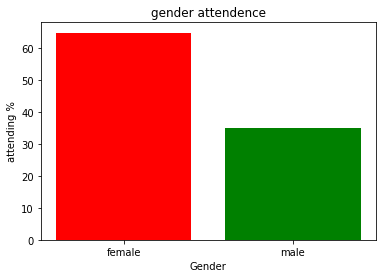

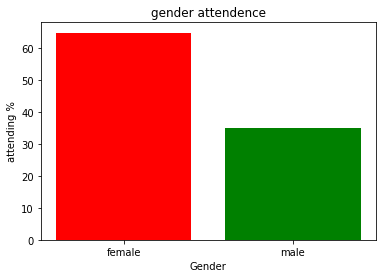

In [34]:
#exploring relation betweeen gender and no-show 
f=57246
m=30962
t_f=df_clean['Gender'][df_clean['Gender']==1].value_counts()
t_m=df_clean['Gender'][df_clean['Gender']==0].value_counts()

print('percentage of females who attended out of the total attendence {} %'.format((f/(f+m))*100))
print('percentage of males who attended out of the total attendence {} %'.format((m/(f+m))*100))

female=(f/(f+m))*100
male=(m/(f+m))*100
left = [1, 2]
height = [female,male]
tick_label = ['female','male']
plt.bar(left, height, tick_label = tick_label,width = 0.8, color = ['red', 'green'])
plt.xlabel('Gender')
plt.ylabel('attending %')
plt.title('gender attendence')
plt.show()

left = [1, 2]
height = [female,male]
tick_label = ['female','male']
plt.bar(left, height, tick_label = tick_label,width = 0.8, color = ['red', 'green'])
plt.xlabel('Gender')
plt.ylabel('attending %')
plt.title('gender attendence')
plt.show()


percentage of females who attende out of the total female signed for appointment 79.68541202672606 %
percentage of males who attende out of the total male signed for appointment 80.03205211052808 %


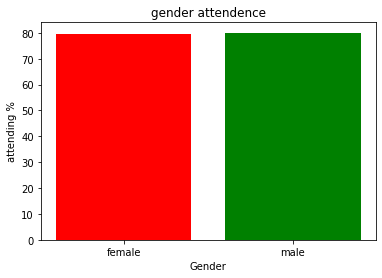

In [35]:
#gender attending out of the total gender

f=57246
m=30962
t_f=df_clean['Gender'][df_clean['Gender']==1].value_counts()
t_m=df_clean['Gender'][df_clean['Gender']==0].value_counts()

print('percentage of females who attende out of the total female signed for appointment {} %'.format((f/t_f[1])*100))
print('percentage of males who attende out of the total male signed for appointment {} %'.format((m/t_m[0])*100))

female=(f/(t_f[1]))*100
male=(m/(t_m[0]))*100
left = [1, 2]
height = [female,male]
tick_label = ['female','male']
plt.bar(left, height, tick_label = tick_label,width = 0.8, color = ['red', 'green'])
plt.xlabel('Gender')
plt.ylabel('attending %')
plt.title('gender attendence')
plt.show()


79.6 % of the female patients attend thier appointment and 20.4% missed thier appointment
80% of the male patients attend thier appointment and 20% missed thier appointment


conclusion both male and female having the same percentage attending and missing apointments so gender doesn't effect No-show

Assumption 4

Assuming type of disease effect the attendence of appointments

In [36]:
# exploring relation between diseases types and no-show
df_clean[df_clean['No-show']==1].agg({'Diabetes':['value_counts']})

,Diabetes
,value_counts
0,81695
1,6513


In [37]:
Diabetes=6513
t_Diabetes=df_clean.Diabetes.sum()
print('percentage of pepole have diabetes attended the appointments {} '.format((Diabetes/t_Diabetes)*100))

percentage of pepole have diabetes attended the appointments 81.99672667757774 


In [38]:

df_clean[df_clean['No-show']==1].agg({'Hipertension':['value_counts']})

,Hipertension
,value_counts
0,70179
1,18029


In [39]:
Hipertension=18029
t_Hipertension=df_clean.Hipertension.sum()
print('percentage of pepole have Hipertension attended the appointments {} '.format((Hipertension/t_Hipertension)*100))

percentage of pepole have Hipertension attended the appointments 82.69804137424889 


In [40]:

df_clean[df_clean['No-show']==1].agg({'Alcoholism':['value_counts']})

,Alcoholism
,value_counts
0,85525
1,2683


In [41]:
Alcoholism=2683
t_Alcoholism=df_clean.Alcoholism.sum()
print('percentage of pepole have Alcoholism attended the appointments {} '.format((Alcoholism/t_Alcoholism)*100))

percentage of pepole have Alcoholism attended the appointments 79.85119047619048 


In [42]:
df_clean[df_clean['No-show']==1].agg({'Handcap':['value_counts']})


,Handcap
,value_counts
0,86374
1,1676
2,146
3,10
4,2


In [43]:
Handcap=1834
t_Handcap=df_clean.Handcap.sum()
print('percentage of pepole have Handcap attended the appointments {} '.format((Handcap/t_Handcap)*100))

percentage of pepole have Handcap attended the appointments 74.58316388775926 


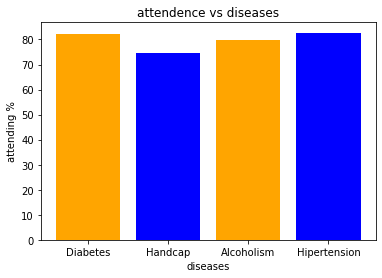

81.99672667757774 74.58316388775926 79.85119047619048 82.69804137424889


In [44]:
d=(Diabetes/t_Diabetes)*100
h=(Handcap/t_Handcap)*100
a=(Alcoholism/t_Alcoholism)*100
t=(Hipertension/t_Hipertension)*100
left = [1, 2,3,4]
height = [d,h,a,t]
tick_label = ['Diabetes','Handcap','Alcoholism','Hipertension']
plt.bar(left, height, tick_label = tick_label,width = 0.8, color = ['orange', 'blue'])
plt.xlabel('diseases')
plt.ylabel('attending %')
plt.title('attendence vs diseases')
plt.show()
print(d,h,a,t)

Conclustion People have diabetes and hypertension are more likily to attend the appointments

Assumption 5

Assuming week_day effect people attendence incase of weekend or middle of the week

In [45]:

#exploring relation between days of the week and no-show
df_clean['week_day']=df_clean['AppointmentDay'].dt.day_name()

In [46]:
df_clean['week_day']

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
110522    Tuesday
110523    Tuesday
110524    Tuesday
110525    Tuesday
110526    Tuesday
Name: week_day, Length: 110527, dtype: object

In [47]:
attending_days=df_clean[df_clean['No-show']==1].agg({'week_day':['value_counts']})
attending_days

,week_day
,value_counts
Wednesday,20774
Tuesday,20488
Monday,18025
Friday,14982
Thursday,13909
Saturday,30


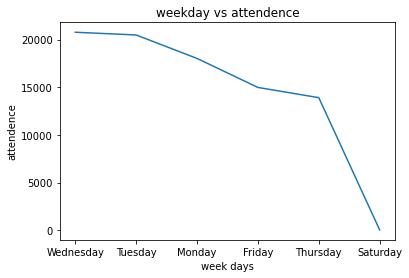

In [53]:
plt.plot(attending_days)
plt.title('weekday vs attendence')
plt.xlabel('week days')
plt.ylabel('attendence')

plt.show()

In [55]:
missed_days=df_clean[df_clean['No-show']==0].agg({'week_day':['value_counts']})
missed_days

,week_day
,value_counts
Tuesday,5152
Wednesday,5093
Monday,4690
Friday,4037
Thursday,3338
Saturday,9


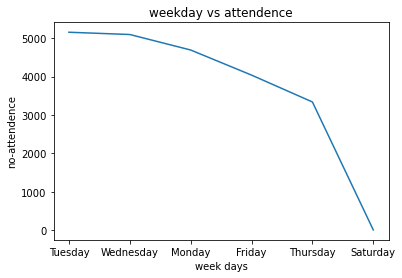

In [56]:
plt.plot(missed_days)
plt.title('weekday vs attendence')
plt.xlabel('week days')
plt.ylabel('no-attendence')

plt.show()

Conclusion people prefer more to attend thier appointments in the middle days of the week more than weekend days (saturday)

Assumption 6

In [ ]:
Assuming receiving/not receiving SMS effect people attendence

  SMS_received
  value_counts
0        62510
1        25698


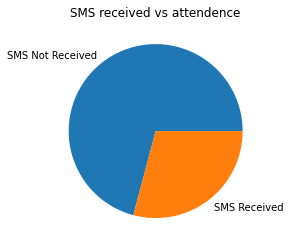

29.133411935425357


In [149]:
#exploring relation between SMS receiving and no-show

df=df_clean[df_clean['No-show']==1].agg({'SMS_received':['value_counts']})
v1=df['SMS_received'].iloc[0][0]
v2=df['SMS_received'].iloc[1][0]
print(df)
lables = 'SMS Not Received', 'SMS Received'
values = [v1,v2]
plt.pie(values,labels=lables)
plt.title('SMS received vs attendence')
plt.show()
print(v2/(v1+v2)*100)

Conclusion the majority of the people who attended didn't receive sms
so receiving sms has no effect on attendence 

In [56]:
df_clean.corr()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,diff_day
PatientId,1.000000,0.004039,-0.007890,-0.004094,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749,0.001461,-0.001100
AppointmentID,0.004039,1.000000,-0.018496,-0.018728,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618,0.162602,-0.771189
Gender,-0.007890,-0.018496,1.000000,0.106411,0.114293,0.055718,0.032554,-0.106167,-0.022814,0.046298,-0.004119,0.027199
Age,-0.004094,-0.018728,0.106411,1.000000,-0.090978,0.500905,0.294013,0.097837,0.074821,0.013998,0.060850,0.032098
Scholarship,-0.002880,0.022615,0.114293,-0.090978,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,-0.029135,-0.030074
Hipertension,-0.006441,0.012752,0.055718,0.500905,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,0.035701,-0.018747
Diabetes,0.001605,0.022628,0.032554,0.294013,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,0.015180,-0.028080
Alcoholism,0.011011,0.032944,-0.106167,0.097837,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,0.000196,-0.037821
Handcap,-0.007916,0.014106,-0.022814,0.074821,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,0.006076,-0.019540
SMS_received,-0.009749,-0.256618,0.046298,0.013998,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,-0.126431,0.388196


In [151]:
df_clean.to_csv('No-show_appointment_new.csv')